In [235]:
from os import path
from tabulate import tabulate
from process import *

In [236]:
# Set up dirs/filenames
results_dir = 'perftest/results'
hosts = [20, 30, 40, 50]
tests = [6, 5, 4, 1]
host_dirs = [[results_dir + '/results_{}hosts_0{}'.format(num_hosts, str(i)) 
               for i in range(1, num_tests+1)] for num_hosts,num_tests in zip(hosts,tests)]
# Map from num_hosts to paths of results
host_dirs = dict(zip(hosts, host_dirs))  

metrics = ['transfer', 'throughput', 'latency']
units = ['MBytes', 'MBit/s', '\u03BCs']
protocols = ['dsp', 'ecmp', 'ksp']
exps = ['eight', 'single']
# Filenames in each result directory (all the same)
filenames = [['{0}_{1}.txt'.format(p, e) for p in protocols] for e in exps]
filenames = dict(zip(exps, filenames))

# Data Visualizations

In [237]:
import numpy as np
import matplotlib.pyplot as plt

In [279]:
def plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, metric):
    fig = plt.figure()
#     ax = plt.subplot(111)
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.plot(hosts, ecmp_data, label='ECMP')
    ax.plot(hosts, ksp_data, label='KSP')
    ax.plot(hosts, dsp_data, label='DSP')
    
    unit = units[metrics.index(metric)]
    plt.xlabel('Number of hosts', fontsize=12)
    plt.ylabel('{} ({})'.format(metric.capitalize(), unit), fontsize=12)
    plt.title('{} vs Number of Hosts'.format(metric.capitalize()), fontsize=16)
    ax.legend()

    t_min, t_max = 0, np.max([ecmp_data, ksp_data, dsp_data])
    # plt.axis((hosts[0], hosts[-1], 0, t_max))
    plt.xticks(hosts)
    # plt.yticks(np.arange(t_min, t_max+1, 1))

    plt.show()

In [274]:
def aggregate_average(num_hosts, num_flows):
    dir = host_dirs[num_hosts]
    files = filenames[num_flows]
    ecmp, ksp, dsp = [], [], []
    for subdir in dir:
        dsp.append(read_file(subdir + '/' + files[0]))
        ecmp.append(read_file(subdir + '/' + files[1]))
        ksp.append(read_file(subdir + '/' + files[2]))
    results = [np.mean(results, 0) for results in [dsp, ecmp, ksp]]
    results = [dict(zip(metrics, result)) for result in results]
        
    return dict(zip(protocols, results))

In [275]:
def plot_results(num_flows, metric):
    data = [aggregate_average(num_hosts, num_flows) for num_hosts in hosts]

    ecmp_data = [sub_data['ecmp'][metric] for sub_data in data]
    ksp_data = [sub_data['ksp'][metric] for sub_data in data]
    dsp_data = [sub_data['dsp'][metric] for sub_data in data]
        
    plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, metric, nu)

## Throughput

### Single-Flow

<Figure size 432x288 with 0 Axes>

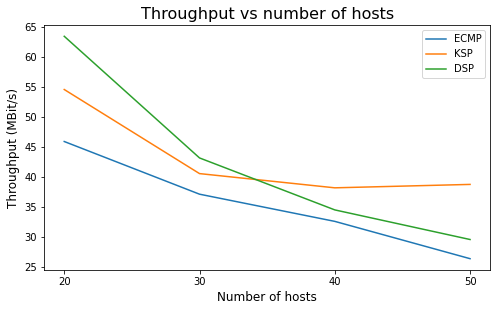

In [276]:
plot_results('single', 'throughput')

### Eight-Flow

<Figure size 432x288 with 0 Axes>

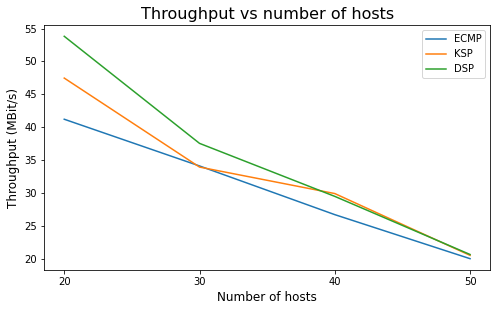

In [278]:
plot_results('eight', 'throughput')

## Latency

### Single-Flow

<Figure size 432x288 with 0 Axes>

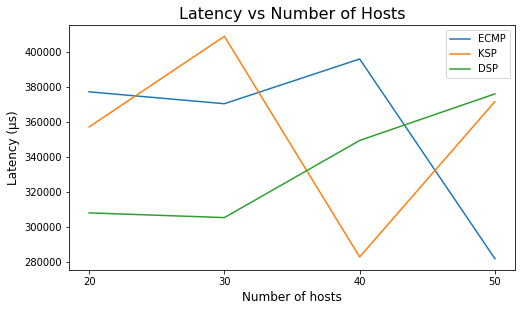

In [280]:
plot_results('single', 'latency')

### Eight-flow

<Figure size 432x288 with 0 Axes>

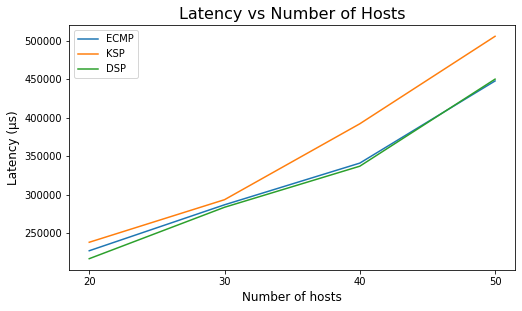

In [281]:
plot_results('eight','latency')